# Infer Price of House by Random Forest Classification

In [51]:
# Imporing Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

### Read our Housing Dataset 

You must Download Dataset on Keagle. Just follow this [link](https://www.kaggle.com/datasets/ashydv/housing-dataset?resource=download) 

In [2]:
data = pd.read_csv('./Housing.csv')  
data.head()  

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Understanding our data

In [5]:
print("Rows and Columns of the dataset : ",data.shape)

Rows and Columns of the dataset :  (545, 13)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##### Columns or Features Description
- 'price': The price of the house (target variable).
- 'area': The area or size of the house in square feet.
- 'bedrooms': The number of bedrooms in the house.
- 'bathrooms': The number of bathrooms in the house.
- 'stories': The number of stories or floors in the house.
- 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
- 'guestroom': Categorical variable indicating whether the house has a guest room or not.
- 'basement': Categorical variable indicating whether the house has a basement or not.
- 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
- 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
- 'parking': The number of parking spaces available with the house.
- 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
- 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).

In [8]:
data.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Exploratory Analysis

##### Handling Binary Categorical Variables (Yes/No) Categories

In [9]:
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [10]:
def binary_map(x):
  """
  Function to map 'yes' and 'no' values to 1 and 0, respectively.
    
  Parameters:
  x (pandas Series): Input Series containing 'yes' and 'no' values.
    
  Returns:
  pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
  """
  return x.map({'yes': 1, 'no': 0})

In [11]:
data[categorical_col] = data[categorical_col].apply(binary_map)
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


##### Handling Categorical data with Dummy Variable

In [13]:
# Perform one-hot encoding of the 'furnishingstatus' column
# Create dummy variables for each unique category in the 'furnishingstatus' column
dummy_col = pd.get_dummies(data['furnishingstatus'])

# Display the first few rows of the resulting DataFrame
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [14]:
dummy_col = pd.get_dummies(data['furnishingstatus'], drop_first=True)


dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [15]:
data = pd.concat([data, dummy_col], axis=1)


data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [16]:
data.drop(['furnishingstatus'], axis=1, inplace=True)


data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


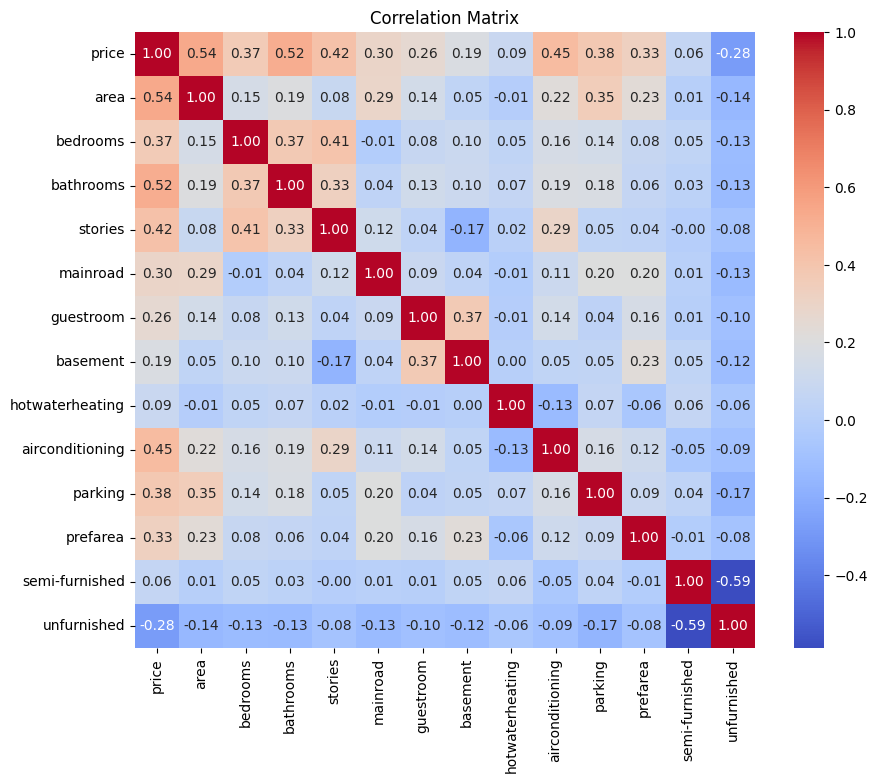

In [20]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Splitting data into Training and Testing data

In [21]:
np.random.seed(0)

df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [22]:
print('Shape of DataSet to Train our Model is: ', df_train.shape)
print('Shape of DataSet to Test our Model is: ', df_test.shape)

Shape of DataSet to Train our Model is:  (381, 14)
Shape of DataSet to Test our Model is:  (164, 14)


#### Scaling Training Data: MinMaxScaler

"The `MinMaxScaler` is a commonly used preprocessing technique in machine learning to scale (normalize) the features of the dataset to a specific range, usually between 0 and 1.

Here's a summary of how it works and what it's used for:

1. **Feature Scaling**: Many machine learning algorithms, such as linear regression, logistic regression, SVM, and neural networks, perform better or converge faster when the features are on the same scale. The `MinMaxScaler` is a way to achieve this normalization.

2. **Linear Transformation**: The `MinMaxScaler` transforms each feature (column) individually by applying the following formula:

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

Where:

   - \( X \) is the original value of the feature.
   - \( X_{min} \) is the minimum value of the feature.
   - \( X_{max} \) is the maximum value of the feature.

3. **Specified Range**: The result of the `MinMaxScaler` is guaranteed to be within the specified range. By default, this range is between 0 and 1, but you can also specify a different range if desired.

4. **Preservation of Order Relations**: The `MinMaxScaler` preserves the order relations of the original data. That is, if \( X_i > X_j \), then \( X_{scaled_i} > X_{scaled_j} \).

In Python, using the `MinMaxScaler` typically involves the following steps:

- Importing the `MinMaxScaler` class from the `preprocessing` module of scikit-learn.
- Instantiating a `MinMaxScaler` object.
- Fitting the scaler to the training data using the `fit` method.
- Transforming the training data using the `transform` method.
- Optionally, transforming the test data or production data using the same fitted scaler.

This ensures that both the training and test data are on the same scale, which is essential for many machine learning algorithms to function properly."

In [24]:
scaler = MinMaxScaler()

In [25]:
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [26]:
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [28]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,False,True
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,True,False
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,False,False
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,False,False
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,False,True


In [35]:
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,True,False
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,True,False
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,True,False
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,True,False
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,True,False


#### Training the RandomForestRegressor Model

In [29]:
y_train = df_train.pop('price')


x_train = df_train

In [36]:
y_test = df_test.pop('price')


x_test = df_test

In [33]:
# Init regressor RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

In [34]:
# Train the model with train data scaled
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = regressor.predict(x_test)

In [42]:
y_test_matrix = y_test.values.reshape(-1, 1)
data_frame_validation = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': y_pred.flatten()})
# Display the first 10 rows of the DataFrame
data_frame_validation.head(10)

,actual,predicted
0,0.247651,0.163613
1,0.530201,0.336042
2,0.328859,0.337727
3,0.261745,0.270673
4,0.245638,0.234242
5,0.275168,0.212367
6,0.644295,0.514791
7,0.328859,0.354673
8,0.087248,0.119442
9,0.395973,0.294600


In [59]:
def calculate_error_square(actual_value , prediction_value):
  return (actual_value - prediction_value)**2


In [62]:
df_to_correlation_with_rmse = df_test
df_to_correlation_with_rmse['rmse'] = calculate_error_square(data_frame_validation['actual'].values , data_frame_validation['predicted'].values )
df_to_correlation_with_rmse.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,rmse
265,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,True,False,0.007062
54,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,True,False,0.037698
171,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,True,False,0.000079
244,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,True,False,0.000080
268,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,True,False,0.000130


#### Plot Comparison Charts

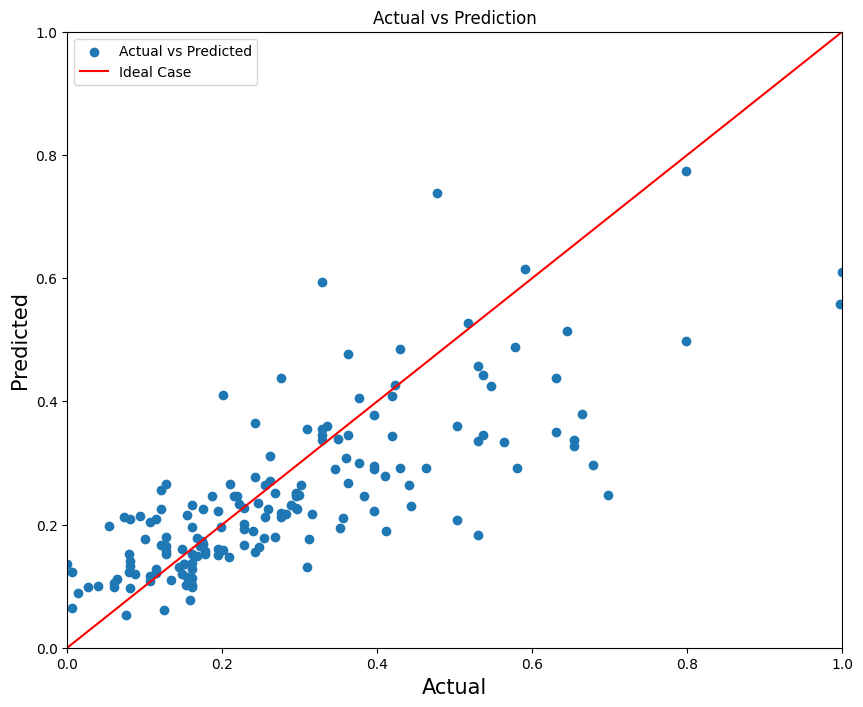

In [53]:
# Create a new figure
fig = plt.figure(figsize=(10, 8))

# Generate ideal case data
ideal_case = np.linspace(0, 1, len(y_pred))

# Scatter plot of actual versus predicted values
plt.scatter(y_test, y_pred, label='Actual vs Predicted')

# Plot line of ideal case prediction
plt.plot(ideal_case, ideal_case, color='red', label='Ideal Case')

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)

plt.ylim(0, 1) 
plt.xlim(0, 1) 

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [49]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.016342811370233263


In [52]:
r2 = r2_score(y_test,y_pred)
print("R Square: " , r2)

R Square:  0.5471610782012528


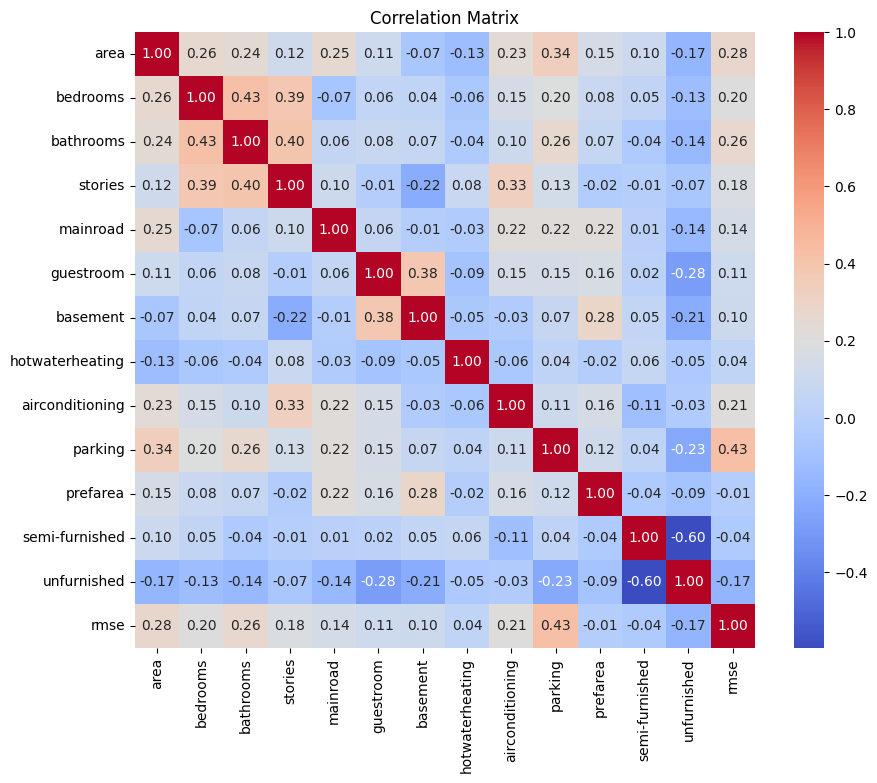

In [63]:
# Create a correlation matrix
correlation_matrix_with_error = df_to_correlation_with_rmse.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_error, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()